<a href="https://colab.research.google.com/github/SenorFoca/FYP_w1834002/blob/main/w1834002_FYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display the columns with the count of missing values
print(missing_values)

# Calculate the total number of missing values
total_missing = missing_values.sum()

# Display appropriate message based on the count of missing values
if total_missing == 0:
    print("\nThere are no missing values.")
else:
    print(f"\nThere are {total_missing} missing values.")

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no missing values.


In [6]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Create new columns for the scaled versions
df['time_scaled'] = scaler.fit_transform(df[['Time']])
df['amount_scaled'] = scaler.fit_transform(df[['Amount']])

In [7]:
# Drop the original 'time' and 'amount' columns
df.drop(['Time', 'Amount'], axis=1, inplace=True)

df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,time_scaled,amount_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.996583,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.996583,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.996562,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.996562,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.996541,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,1.641931,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,1.641952,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,1.641974,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,1.641974,-0.313249


In [8]:
# Calculate the total number of each class
class_counts_number = df['Class'].value_counts()

print(f"No Frauds: {class_counts_number[0]} transactions")
print(f"Frauds: {class_counts_number[1]} transactions")

No Frauds: 284315 transactions
Frauds: 492 transactions


In [9]:
# Calculate the percentage of each class
class_counts_percentage = df['Class'].value_counts(normalize=True) * 100

print(f"No Frauds: {class_counts_percentage[0]:.2f}% of the dataset")
print(f"Frauds: {class_counts_percentage[1]:.2f}% of the dataset")

No Frauds: 99.83% of the dataset
Frauds: 0.17% of the dataset


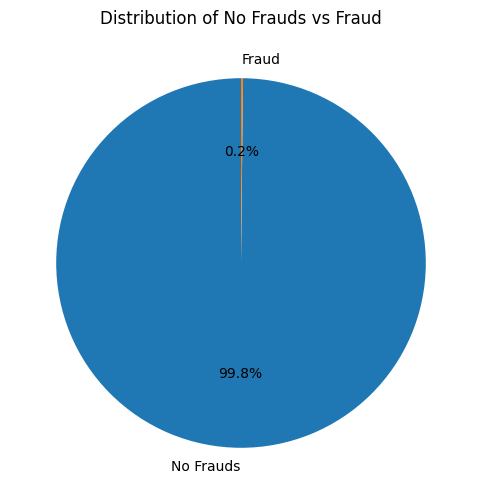

In [10]:
# Labels for the classes
labels = ['No Frauds' if index == 0 else 'Fraud' for index in class_counts_percentage.index]

#Plotting
plt.figure(figsize=(8, 6))
plt.pie(class_counts_percentage, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of No Frauds vs Fraud')
plt.show()

In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate input features and target variable
X = df.drop('Class', axis=1)  # Input features
y = df['Class']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Apply SMOTE to augment the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [12]:
# Checking the class distribution after applying the combination
print("After applying SMOTE and Random Undersampling, counts of label '0': {}".format(sum(y_train_balanced == 0)))
print("After applying SMOTE and Random Undersampling, counts of label '1': {}".format(sum(y_train_balanced == 1)))

# Calculate the percentage of each class
class_percentage_balanced = y_train_balanced.value_counts(normalize=True) * 100

print(f"\nNo Frauds: {class_percentage_balanced[0]:.2f}% of the dataset")
print(f"Frauds: {class_percentage_balanced[1]:.2f}% of the dataset")

After applying SMOTE and Random Undersampling, counts of label '0': 227451
After applying SMOTE and Random Undersampling, counts of label '1': 227451

No Frauds: 50.00% of the dataset
Frauds: 50.00% of the dataset


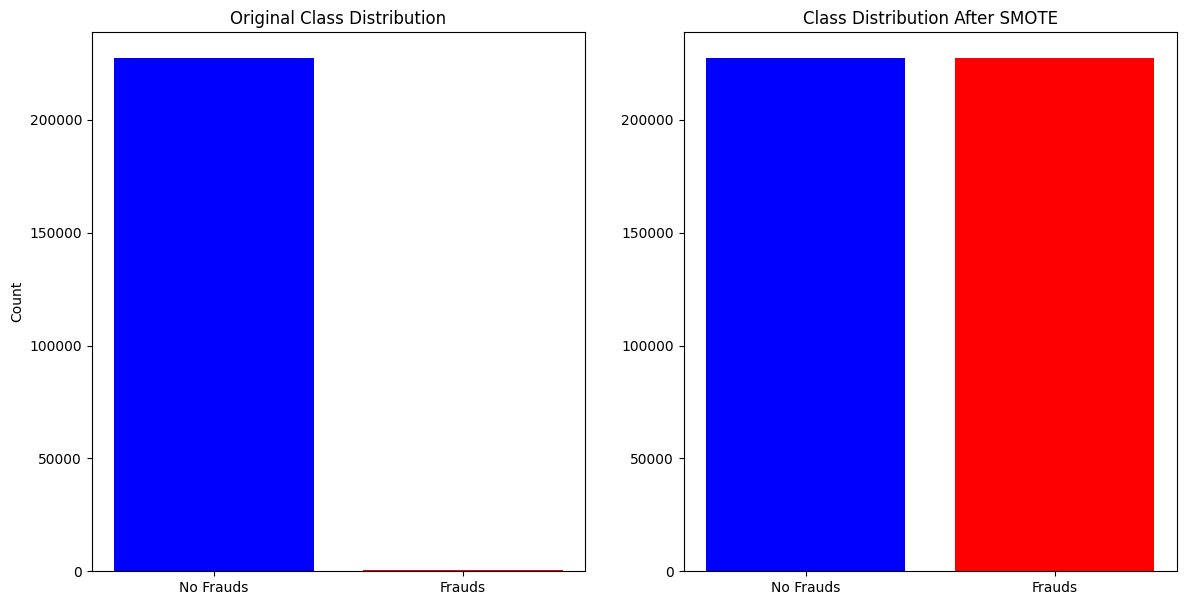

In [13]:
# Calculate the class distribution after resampling
original_class_distribution = y_train.value_counts()
new_class_distribution = y_train_balanced.value_counts()

# Setting up the figure and axes for the subplot
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Original class distribution plot
ax[0].bar(original_class_distribution.index, original_class_distribution.values, color=['blue', 'red'])
ax[0].set_title('Original Class Distribution')
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['No Frauds', 'Frauds'])
ax[0].set_ylabel('Count')

# Class distribution after SMOTE plot
ax[1].bar(new_class_distribution.index, new_class_distribution.values, color=['blue', 'red'])
ax[1].set_title('Class Distribution After SMOTE')
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['No Frauds', 'Frauds'])

# Display the plots
plt.show()

# Algorithms

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report,confusion_matrix
import seaborn as sns

### Neural Network with Batch Normalization

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation

In [ ]:
# Model architecture for DNN with Batch Normalization
model_batch = Sequential([
    Dense(64, input_shape=(X_train_balanced.shape[1],)),  # Input layer dimensions should match the number of features
    Activation('relu'),  # Activation layer for ReLU
    BatchNormalization(),  # Batch Normalization after the first dense layer
    Dropout(0.5),  # Dropout after batch normalization

    Dense(32),  # Second hidden layer with 32 nodes
    Activation('relu'),  # Activation layer for ReLU
    BatchNormalization(),  # Batch Normalization after the second dense layer
    Dropout(0.5),  # Dropout after batch normalization

    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model_batch.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_batch.fit(X_train_balanced, y_train_balanced, epochs=25, batch_size=32, validation_data=(X_test, y_test))




Epoch 1/25
14216/14216 [==============================] - 46s 3ms/step - loss: 0.0900 - accuracy: 0.9678 - val_loss: 0.0141 - val_accuracy: 0.9959
Epoch 2/25
14216/14216 [==============================] - 43s 3ms/step - loss: 0.0479 - accuracy: 0.9847 - val_loss: 0.0122 - val_accuracy: 0.9965
Epoch 3/25
14216/14216 [==============================] - 41s 3ms/step - loss: 0.0357 - accuracy: 0.9889 - val_loss: 0.0076 - val_accuracy: 0.9982
Epoch 4/25
14216/14216 [==============================] - 42s 3ms/step - loss: 0.0314 - accuracy: 0.9902 - val_loss: 0.0075 - val_accuracy: 0.9982
Epoch 5/25
14216/14216 [==============================] - 40s 3ms/step - loss: 0.0289 - accuracy: 0.9913 - val_loss: 0.0060 - val_accuracy: 0.9987
Epoch 6/25
14216/14216 [==============================] - 41s 3ms/step - loss: 0.0265 - accuracy: 0.9920 - val_loss: 0.0070 - val_accuracy: 0.9983
Epoch 7/25
14216/14216 [==============================] - 41s 3ms/step - loss: 0.0251 - accuracy: 0.9925 - val_loss: 0

In [ ]:

# Making predictions on the test set
y_pred = model_batch.predict(X_test)
y_pred_batch = (y_pred > 0.5).astype("int32")

# Evaluating the model
accuracy_batch = accuracy_score(y_test, y_pred_batch)
precision_batch = precision_score(y_test, y_pred_batch)
recall_batch = recall_score(y_test, y_pred_batch)

print("Neural Network Batch:\n" + "-" * 15)
print(f"Accuracy: {accuracy_batch:.4f}")
print(f"Precision: {precision_batch:.4f}")
print(f"Recall: {recall_batch:.4f}")


1781/1781 [==============================] - 3s 1ms/step
Neural Network Batch:
---------------
Accuracy: 0.9991
Precision: 0.6829
Recall: 0.8571


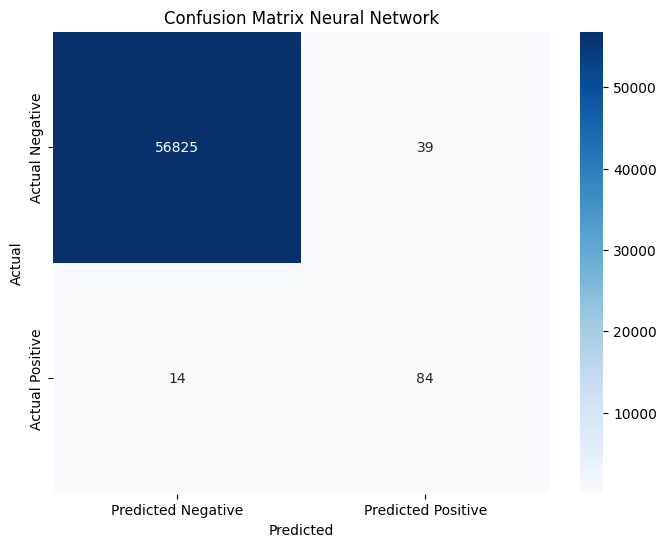

In [ ]:

# Compute the confusion matrix
conf_matrix_batch = confusion_matrix(y_test, y_pred_batch)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_batch, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Neural Network')
plt.show()

###Deep Neural Network

In [ ]:

# Neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_balanced.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_balanced, y_train_balanced, epochs=25, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/25
14216/14216 [==============================] - 35s 2ms/step - loss: 0.0154 - accuracy: 0.9954 - val_loss: 0.0096 - val_accuracy: 0.9982
Epoch 2/25
14216/14216 [==============================] - 33s 2ms/step - loss: 0.0049 - accuracy: 0.9989 - val_loss: 0.0117 - val_accuracy: 0.9986
Epoch 3/25
14216/14216 [==============================] - 35s 2ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.0100 - val_accuracy: 0.9986
Epoch 4/25
14216/14216 [==============================] - 33s 2ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.0093 - val_accuracy: 0.9991
Epoch 5/25
14216/14216 [==============================] - 35s 2ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 0.0097 - val_accuracy: 0.9989
Epoch 6/25
14216/14216 [==============================] - 33s 2ms/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0089 - val_accuracy: 0.9989
Epoch 7/25
14216/14216 [==============================] - 32s 2ms/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0

In [ ]:

# Making predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Converting probabilities to class labels (0 or 1)

# Evaluating the model
accuracy_nn = accuracy_score(y_test, y_pred_classes)
precision_nn = precision_score(y_test, y_pred_classes)
recall_nn = recall_score(y_test, y_pred_classes)

print("Neural Network:\n" + "-" * 15)
print(f"Accuracy: {accuracy_nn:.4f}")
print(f"Precision: {precision_nn:.4f}")
print(f"Recall: {recall_nn:.4f}")


1781/1781 [==============================] - 6s 3ms/step
Neural Network:
---------------
Accuracy: 0.9992
Precision: 0.7193
Recall: 0.8367


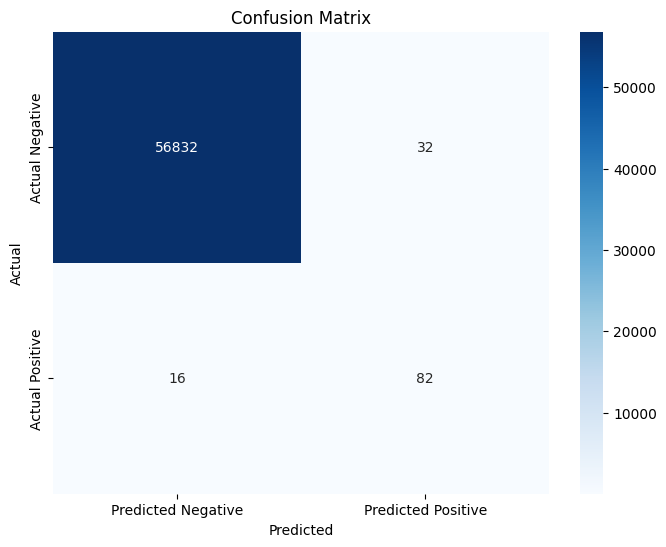

In [ ]:
# Compute the confusion matrix
conf_matrix_nn = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:

# Initialize the Random Forest classifier with some sensible defaults
rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)

# Train the Random Forest on the balanced training dataset
rf.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Random Forest Classifier results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Random Forest Classifier results:
Accuracy: 0.9991
Precision: 0.6825
Recall: 0.8776

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.68      0.88      0.77        98

    accuracy                           1.00     56962
   macro avg       0.84      0.94      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
#Random Forest Alternative

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the balanced training data
clf.fit(X_train_balanced, y_train_balanced)

# Predict on the test data
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate the classifier
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)

print("Random Forest classifier:\n" + "-" * 15)
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Random Forest classifier:
---------------
Accuracy: 0.9996
Precision: 0.8925
Recall: 0.8469

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.85      0.87        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



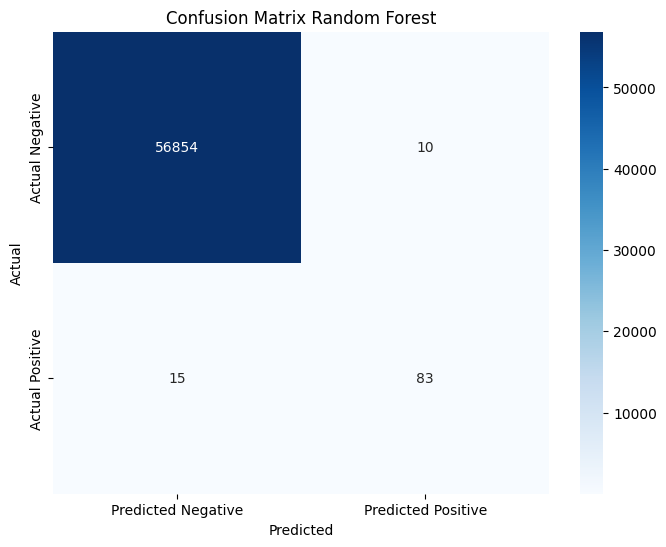

In [ ]:
# Compute the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Random Forest')
plt.show()

In [18]:
from sklearn.metrics import precision_recall_curve, f1_score
import numpy as np

In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score
import numpy as np

# Predict probabilities for the positive class
y_probs = clf.predict_proba(X_test)[:, 1]

# Get precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Calculate F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the threshold that maximizes the F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold: {optimal_threshold:.4f}")

# Use this optimal threshold to make new predictions
y_pred_optimal = (y_probs >= optimal_threshold).astype(int)

# Evaluate the classifier with the optimal threshold
accuracy_rf_final = accuracy_score(y_test, y_pred_optimal)
precision_rf_final = precision_score(y_test, y_pred_optimal)
recall_rf_final = recall_score(y_test, y_pred_optimal)

print("Random Forest classifier with optimal threshold:\n" + "-" * 40)
print(f"Accuracy: {accuracy_rf_final:.4f}")
print(f"Precision: {precision_rf_final:.4f}")
print(f"Recall: {recall_rf_final:.4f}")

Optimal Threshold: 0.5800
Random Forest classifier with optimal threshold:
----------------------------------------
Accuracy: 0.9996
Precision: 0.9419
Recall: 0.8265


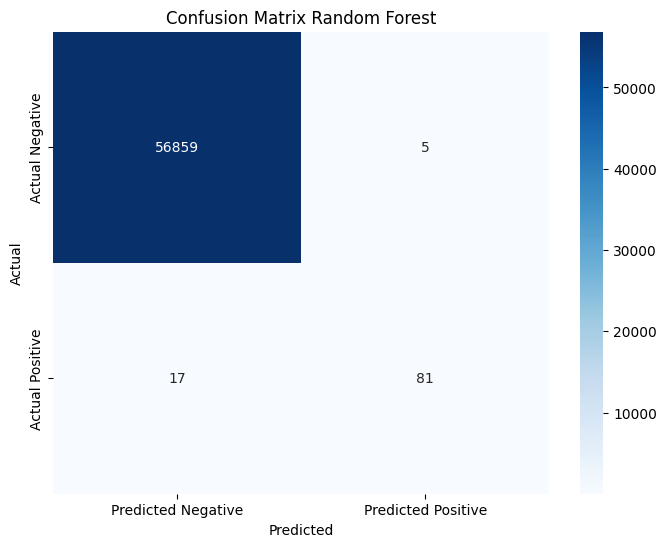

In [ ]:
# Compute the confusion matrix
conf_matrix_rf_2 = confusion_matrix(y_test, y_pred_optimal)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_2, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Random Forest')
plt.show()

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import binarize  # Threshold adjustment

In [ ]:

# Initialize the Logistic Regression model with adjusted class weight
logistic_model = LogisticRegression(
    penalty='l2',
    C=0.05,
    class_weight={0: 1, 1: 10},
    solver='liblinear',
    max_iter=1000
)

# Fit the model on the balanced training data
logistic_model.fit(X_train_balanced, y_train_balanced)

# Predict probabilities
y_pred = logistic_model.predict_proba(X_test)[:, 1]

# Adjust the decision threshold
threshold = 0.7  # Increasing the threshold
y_pred_lr = binarize([y_pred], threshold=threshold)[0]  # Apply threshold

# Evaluate the predictions
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)

print("Logistic Regression Classifier results:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")


conf_matrix_lg = confusion_matrix(y_test, y_pred_lr)
print("\nConfusion Matrix:")
print(conf_matrix_lg)


Logistic Regression Classifier results:
Accuracy: 0.8992
Precision: 0.0156
Recall: 0.9286

Confusion Matrix:
[[51129  5735]
 [    7    91]]


In [ ]:
# Predict probabilities
y_pred_prob = logistic_model.predict_proba(X_test)[:, 1]

# Calculate precision-recall pairs for different probability thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Find the threshold that maximizes precision while retaining a reasonable recall
idx = np.where(precisions > 0.80)[0][0]  # find the first instance where precision exceeds 80%
optimal_threshold = thresholds[idx]
print(f"Optimal threshold for high precision: {optimal_threshold}")

# Apply the optimal threshold
y_pred_optimal = (y_pred_prob >= optimal_threshold).astype(int)

# New precision and recall
new_precision = precision_score(y_test, y_pred_optimal)
new_recall = recall_score(y_test, y_pred_optimal)
print(f"New Precision: {new_precision:.2f}")
print(f"New Recall: {new_recall:.2f}")

Optimal threshold for high precision: 0.9999999999999074
New Precision: 0.81
New Recall: 0.78


In [ ]:

# Initialize the Logistic Regression model
logistic_model_optimal = LogisticRegression(
    penalty='l2',
    C=0.05,  # Stronger regularization
    class_weight={0: 1, 1: 10},  # Adjusted class weights
    solver='liblinear',
    max_iter=1000
)

# Fit the model on the balanced training data
logistic_model_optimal.fit(X_train_balanced, y_train_balanced)

# Predict probabilities
y_pred_prob_optimal = logistic_model_optimal.predict_proba(X_test)[:, 1]

# Applying the optimal threshold
optimal_threshold = 0.9999999999999074  # This is the optimal threshold
y_pred_final = (y_pred_prob_optimal >= optimal_threshold).astype(int)


# Evaluate the predictions
accuracy_lr_final = accuracy_score(y_test, y_pred_final)
precision_lr_final = precision_score(y_test, y_pred_final)
recall_lr_final = recall_score(y_test, y_pred_final)

print("L1 Logistic Regression Classifier results:")
print(f"Accuracy: {accuracy_lr_final:.4f}")
print(f"Precision: {precision_lr_final:.4f}")
print(f"Recall: {recall_lr_final:.4f}")

# Detailed classification report
class_report_final = classification_report(y_test, y_pred_final)
print("\nFinal Model Classification Report:")
print(class_report_final)


L1 Logistic Regression Classifier results:
Accuracy: 0.9993
Precision: 0.8085
Recall: 0.7755

Final Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.78      0.79        98

    accuracy                           1.00     56962
   macro avg       0.90      0.89      0.90     56962
weighted avg       1.00      1.00      1.00     56962



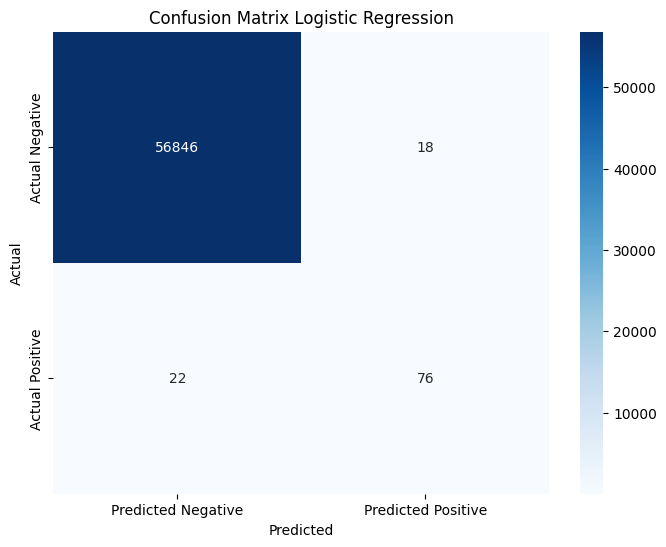

In [ ]:
# Displaying the confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_final)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Logistic Regression')
plt.show()

### XGBoost Classifier

In [16]:
!pip install xgboost

import xgboost as xgb

In [17]:

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Fit the model on the balanced training data
xgb_classifier.fit(X_train_balanced, y_train_balanced)

# Predictions on the test set
y_pred = xgb_classifier.predict(X_test)




In [19]:
# Evaluate the predictions
accuracy_xgb = accuracy_score(y_test, y_pred)
precision_xgb = precision_score(y_test, y_pred)
recall_xgb = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy_xgb:.2f}")
print(f"Precision: {precision_xgb:.2f}")
print(f"Recall: {recall_xgb:.2f}")


Accuracy: 1.00
Precision: 0.74
Recall: 0.85


In [21]:

# Initialize the XGBoost classifier
xgb_classifier_1 = xgb.XGBClassifier(random_state=42)

# Fit the model on the balanced training data
xgb_classifier_1.fit(X_train_balanced, y_train_balanced)

# Get probabilities of the positive class
y_probs = xgb_classifier_1.predict_proba(X_test)[:, 1]
# Define a custom threshold
threshold = 0.9

# Convert probabilities to 0 or 1 based on the threshold
y_pred_custom_threshold = (y_probs >= threshold).astype(int)

# Evaluate the predictions with the custom threshold
accuracy_xgb_final = accuracy_score(y_test, y_pred_custom_threshold)
precision_xgb_final = precision_score(y_test, y_pred_custom_threshold)
recall_xgb_final = recall_score(y_test, y_pred_custom_threshold)

print(f"Accuracy with threshold {threshold}: {accuracy_xgb_final:.2f}")
print(f"Precision with threshold {threshold}: {precision_xgb_final:.2f}")
print(f"Recall with threshold {threshold}: {recall_xgb_final:.2f}")

Accuracy with threshold 0.9: 1.00
Precision with threshold 0.9: 0.94
Recall with threshold 0.9: 0.82


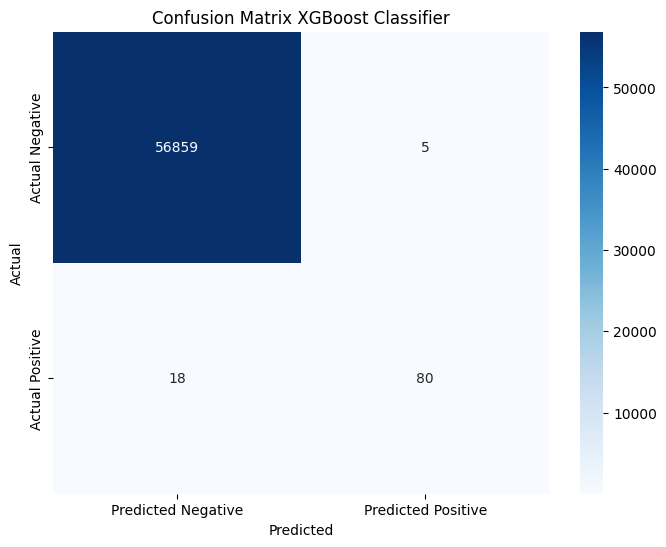

In [22]:
# Displaying the confusion matrix
conf_matrix_xgb_1 = confusion_matrix(y_test, y_pred_custom_threshold)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb_1, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix XGBoost Classifier')
plt.show()

### K Nearest Neighbors (KNN) classifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
# Define the model with specific parameters
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='euclidean', algorithm='auto')

# Fit the model to the balanced training data
knn.fit(X_train_balanced, y_train_balanced)

# Make predictions
predictions = knn.predict(X_test)

# Evaluate the model's performance
accuracy_knn = accuracy_score(y_test, predictions)
precision_knn = precision_score(y_test, predictions)
recall_knn = recall_score(y_test, predictions)


print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")

Accuracy: 0.9986482216214319
Precision: 0.5704697986577181
Recall: 0.8673469387755102


In [25]:

# Define and fit the model
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='euclidean', algorithm='auto')
knn.fit(X_train_balanced, y_train_balanced)

# Get probability estimates
probabilities = knn.predict_proba(X_test)[:, 1]

# Custom threshold
threshold = 0.99

# Convert probabilities to binary predictions based on the threshold
custom_predictions = (probabilities >= threshold).astype(int)

# Evaluate the model with the new predictions
accuracy_knn_final = accuracy_score(y_test, custom_predictions)
precision_knn_final = precision_score(y_test, custom_predictions)
recall_knn_final = recall_score(y_test, custom_predictions)

print(f"Accuracy: {accuracy_knn_final}")
print(f"Precision: {precision_knn_final}")
print(f"Recall: {recall_knn_final}")

Accuracy: 0.9991573329588147
Precision: 0.7155172413793104
Recall: 0.8469387755102041


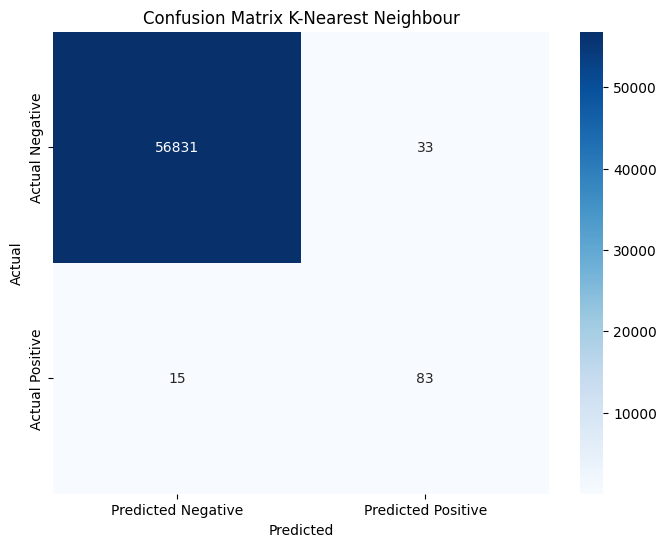

In [26]:
# Displaying the confusion matrix
conf_matrix_knn = confusion_matrix(y_test, custom_predictions)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix K-Nearest Neighbour')
plt.show()

#Comparision

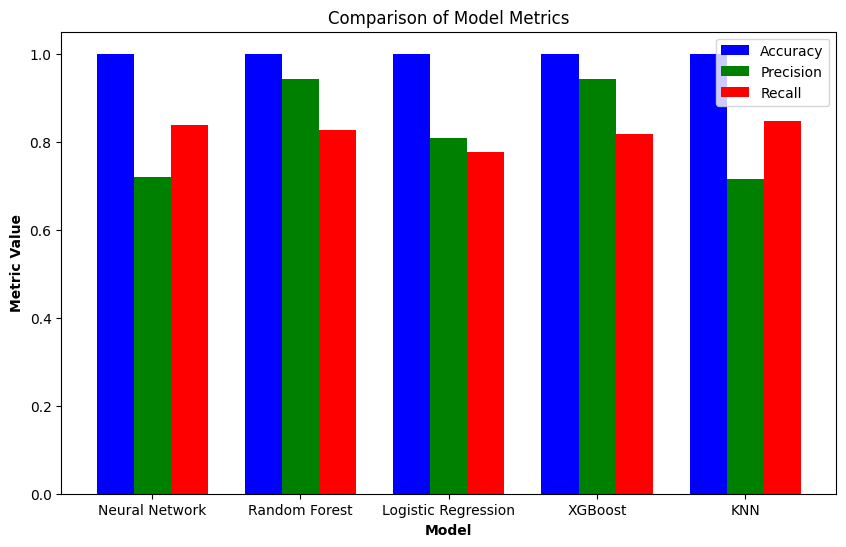

In [ ]:
# Organizing the data into lists
models = ['Neural Network', 'Random Forest', 'Logistic Regression', 'XGBoost', 'KNN']
accuracy = [accuracy_nn, accuracy_rf_final, accuracy_lr_final, accuracy_xgb_final, accuracy_knn_final]
precision = [precision_nn, precision_rf_final, precision_lr_final, precision_xgb_final, precision_knn_final]
recall = [recall_nn, recall_rf_final, recall_lr_final, recall_xgb_final, recall_knn_final]

# Set position of bar on X axis
r1 = np.arange(len(accuracy))
r2 = [x + 0.25 for x in r1]
r3 = [x + 0.25 for x in r2]

# Creating the plot
plt.figure(figsize=(10, 6))
plt.bar(r1, accuracy, color='b', width=0.25, label='Accuracy')
plt.bar(r2, precision, color='g', width=0.25, label='Precision')
plt.bar(r3, recall, color='r', width=0.25, label='Recall')

# Adding labels and customizations
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + 0.25 for r in range(len(accuracy))], models)
plt.ylabel('Metric Value', fontweight='bold')
plt.title('Comparison of Model Metrics')

# Adding a legend to the chart
plt.legend()

# Display the chart
plt.show()
